<a href="https://www.kaggle.com/code/abdellatiefhamed/economic-data-analysis?scriptVersionId=120131303" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install fredapi > /dev/null

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 

plt.style.use('fivethirtyeight')
pd.set_option('max_columns',500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred 
    
from kaggle_secrets import UserSecretsClient
secrets = UserSecretsClient()
fred_key = secrets.get_secret("fred-api")


# 1. craete the fred object 

In [4]:
fred = Fred(api_key=fred_key)

# 2. search for economic data 

In [5]:
sp_search = fred.search('S&P',order_by = 'popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-23,2023-02-23,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-23 09:03:05-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-23,2023-02-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,91,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-23,2023-02-23,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-22,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-23 09:03:10-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-23,2023-02-23,S&P 500,2013-02-25,2023-02-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-23 19:10:56-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-23,2023-02-23,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,82,"For more information regarding the index, plea..."


# 3. pull raw data & plot

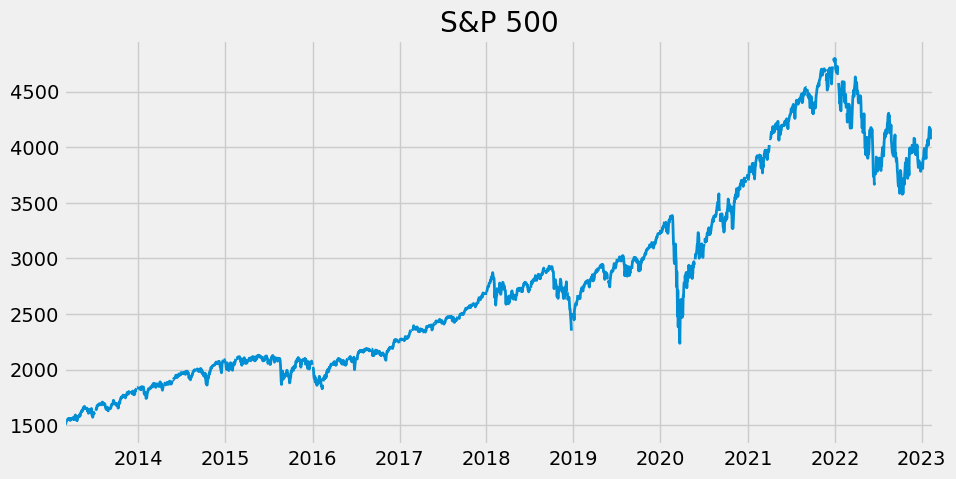

In [7]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(10,5),title ='S&P 500' , lw = 2)
plt.show()

# 4. pull and join multiple series 

In [8]:
uemp_results = fred.search('unemployment')

<AxesSubplot:title={'center':'unrate'}>

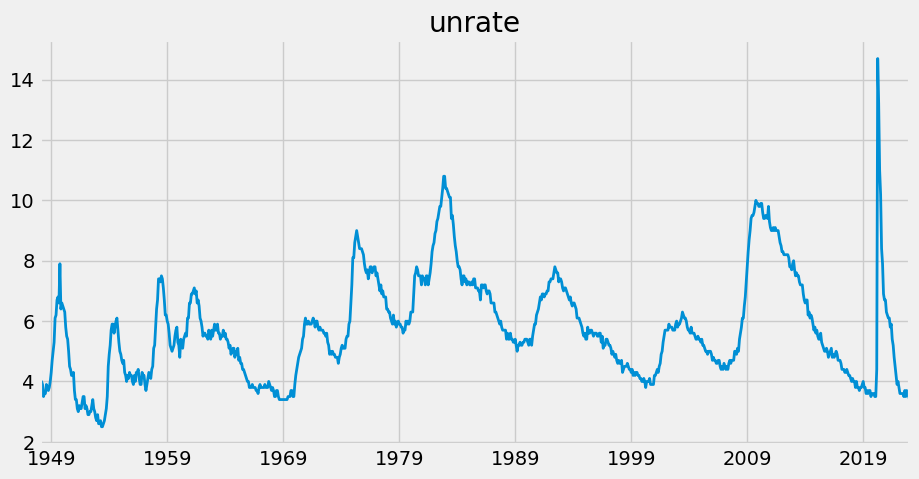

In [9]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5),title ='unrate' , lw = 2)

In [10]:
uemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-23,2023-02-23,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-23,2023-02-23,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,59,The unemployment rate represents the number of...
NROU,NROU,2023-02-23,2023-02-23,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-23,2023-02-23,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-02-23,2023-02-23,Continued Claims (Insured Unemployment),1967-01-07,2023-02-11,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-23 07:33:14-06:00,72,"Continued claims, also referred to as insured ..."


In [11]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted"and units =="Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [12]:
all_results = []

for myid in unemp_df.index:
    if len(myid) <= 5 : 
        results = fred.get_series(myid)
        results = results.to_frame(name = myid)
        all_results.append(results)
unemp_results = pd.concat(all_results , axis = 1)

In [13]:
unemp_states = unemp_results

<AxesSubplot:>

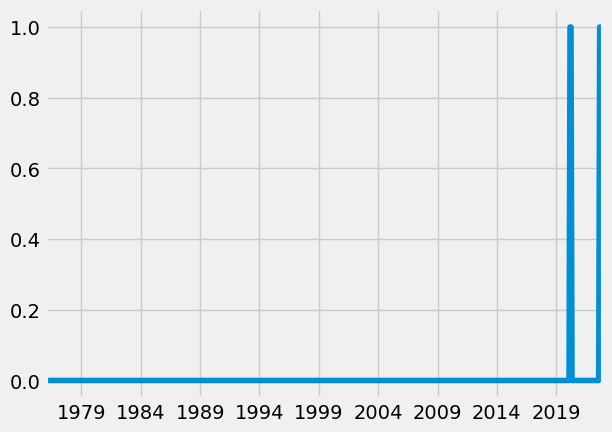

In [14]:
unemp_states.isna().sum(axis = 1).plot()

In [15]:
unemp_states = unemp_results.dropna()
unemp_df = unemp_df.loc[unemp_df['id'].str.len() <= 5]
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [16]:
#plot state unemployment rate 
px.line(unemp_states)

 ## pull April 2020 unemployment rate per state 

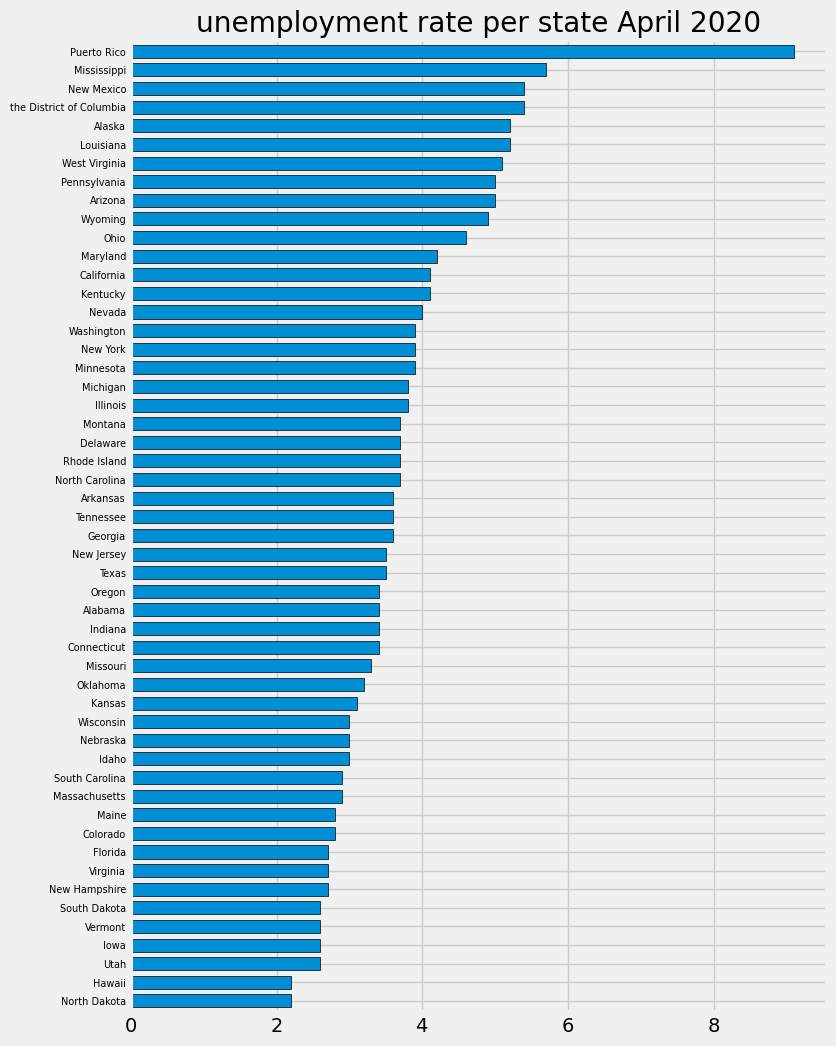

In [17]:
ax= unemp_states.loc[unemp_states.index == '2020-02-01'].T \
.sort_values('2020-02-01') \
.plot(kind = 'barh' , figsize=(8,12) ,title = 'unemployment rate per state April 2020' , width = 0.7 ,edgecolor = 'black')
plt.yticks(rotation = 0 , fontsize = 7)
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [18]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['id'].str.len()<=7]
part_df = part_df.drop(['CIVPART'] , axis = 0 )

In [19]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [20]:
part_states

,California,Alabama,Florida,Kentucky,Minnesota,Ohio,Wisconsin,Michigan,Texas,Tennessee,North Carolina,Georgia,Colorado,Utah,New Mexico,Louisiana,Hawaii,Indiana,New York,Iowa,Nevada,West Virginia,Mississippi,Maryland,Massachusetts,Maine,Pennsylvania,Nebraska,Missouri,Illinois,Oregon,Kansas,South Dakota,Arizona,Idaho,South Carolina,Alaska,Virginia,North Dakota,Washington,New Hampshire,New Jersey,Oklahoma,Montana,Connecticut,Arkansas,Vermont,District Of Columbia,Wyoming,Delaware,Rhode Island
1976-01-01,62.6,57.0,55.8,60.5,65.6,61.7,65.6,61.6,63.8,59.6,66.5,63.7,67.2,62.8,60.8,56.8,69.9,64.0,58.0,64.4,71.3,52.5,58.8,64.3,64.8,62.1,58.4,64.9,60.5,63.0,62.9,65.1,64.6,59.5,63.0,65.3,69.0,65.9,62.6,60.9,65.9,61.5,59.3,62.7,64.2,57.9,63.6,64.4,65.3,62.7,63.8
1976-02-01,62.4,56.9,55.7,60.3,65.5,61.7,65.5,61.5,63.5,59.4,66.3,63.6,67.0,62.6,60.5,56.6,69.6,63.9,58.0,64.3,70.8,52.4,58.6,64.2,64.7,61.9,58.3,64.9,60.3,63.0,62.7,65.0,64.4,59.2,62.8,65.2,68.4,65.8,62.4,60.7,65.6,61.4,59.2,62.5,64.1,57.8,63.4,64.5,64.9,62.5,63.7
1976-03-01,62.2,56.8,55.5,60.2,65.4,61.7,65.4,61.5,63.4,59.3,66.2,63.5,66.8,62.5,60.3,56.5,69.6,63.8,58.0,64.2,70.5,52.3,58.5,64.1,64.6,61.9,58.3,64.8,60.3,62.9,62.5,64.9,64.4,59.1,62.7,65.0,67.8,65.6,62.3,60.6,65.6,61.4,59.1,62.4,64.0,57.7,63.2,64.5,64.7,62.5,63.6
1976-04-01,62.2,56.8,55.5,60.1,65.4,61.6,65.4,61.6,63.5,59.3,66.2,63.5,66.6,62.5,60.3,56.4,69.4,63.8,58.0,64.1,70.4,52.3,58.5,64.1,64.6,61.8,58.3,64.8,60.4,62.9,62.4,65.0,64.3,59.1,62.7,64.9,67.9,65.5,62.5,60.6,65.7,61.5,59.0,62.3,64.1,57.7,63.5,64.5,64.9,62.4,63.7
1976-05-01,62.3,56.8,55.4,60.1,65.5,61.6,65.5,61.7,63.6,59.4,66.3,63.6,66.5,62.6,60.3,56.4,69.3,63.9,58.1,64.1,70.5,52.2,58.5,64.1,64.6,61.7,58.3,64.8,60.6,63.0,62.5,65.1,64.3,59.1,62.8,64.7,67.9,65.4,62.6,60.7,66.0,61.6,59.0,62.2,64.3,57.7,63.6,64.4,65.2,62.4,63.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,62.5,57.2,59.5,58.0,68.2,61.8,65.9,60.1,63.8,60.8,60.6,62.1,69.6,68.1,56.5,58.7,61.0,63.4,60.5,67.7,60.3,55.2,55.3,66.1,65.8,58.6,61.7,69.9,62.4,64.6,63.5,66.2,68.9,61.0,62.7,57.0,65.9,63.7,69.0,64.8,65.8,63.3,60.7,62.7,64.7,56.8,61.8,73.0,63.2,61.0,63.7
2022-09-01,62.3,57.2,59.5,58.0,68.1,61.7,65.6,60.1,63.6,60.5,60.6,62.0,69.4,68.0,56.3,58.5,60.8,63.4,60.3,67.7,60.6,55.1,55.2,65.7,65.6,58.4,61.7,69.9,62.4,64.5,63.3,66.1,68.7,61.1,62.7,56.9,65.7,63.6,68.8,64.7,65.9,63.0,60.6,62.6,64.6,56.8,61.8,72.7,63.1,60.8,63.9
2022-10-01,62.3,57.2,59.6,57.9,68.0,61.5,65.3,60.0,63.6,60.1,60.5,61.8,69.4,67.9,56.1,58.3,60.8,63.3,60.5,67.7,60.9,55.0,55.0,65.9,65.5,58.3,61.7,69.8,62.4,64.4,63.2,66.0,68.6,61.1,62.6,56.7,65.6,63.6,68.7,64.5,65.9,63.3,60.6,62.5,64.5,56.7,61.7,72.5,63.0,60.7,63.9
2022-11-01,62.2,57.1,59.5,57.7,67.9,61.3,64.9,59.9,63.5,59.6,60.4,61.7,69.2,67.9,55.9,58.3,60.6,63.2,60.5,67.7,61.1,54.9,54.8,65.6,65.3,58.0,61.6,69.8,62.5,64.3,63.1,66.0,68.4,61.1,62.5,56.4,65.4,63.6,68.6,64.4,65.8,63.5,60.5,62.4,64.3,56.6,61.7,72.0,63.0,60.5,63.8


In [21]:
unemp_states = unemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})


# plot unemployment vs participations 

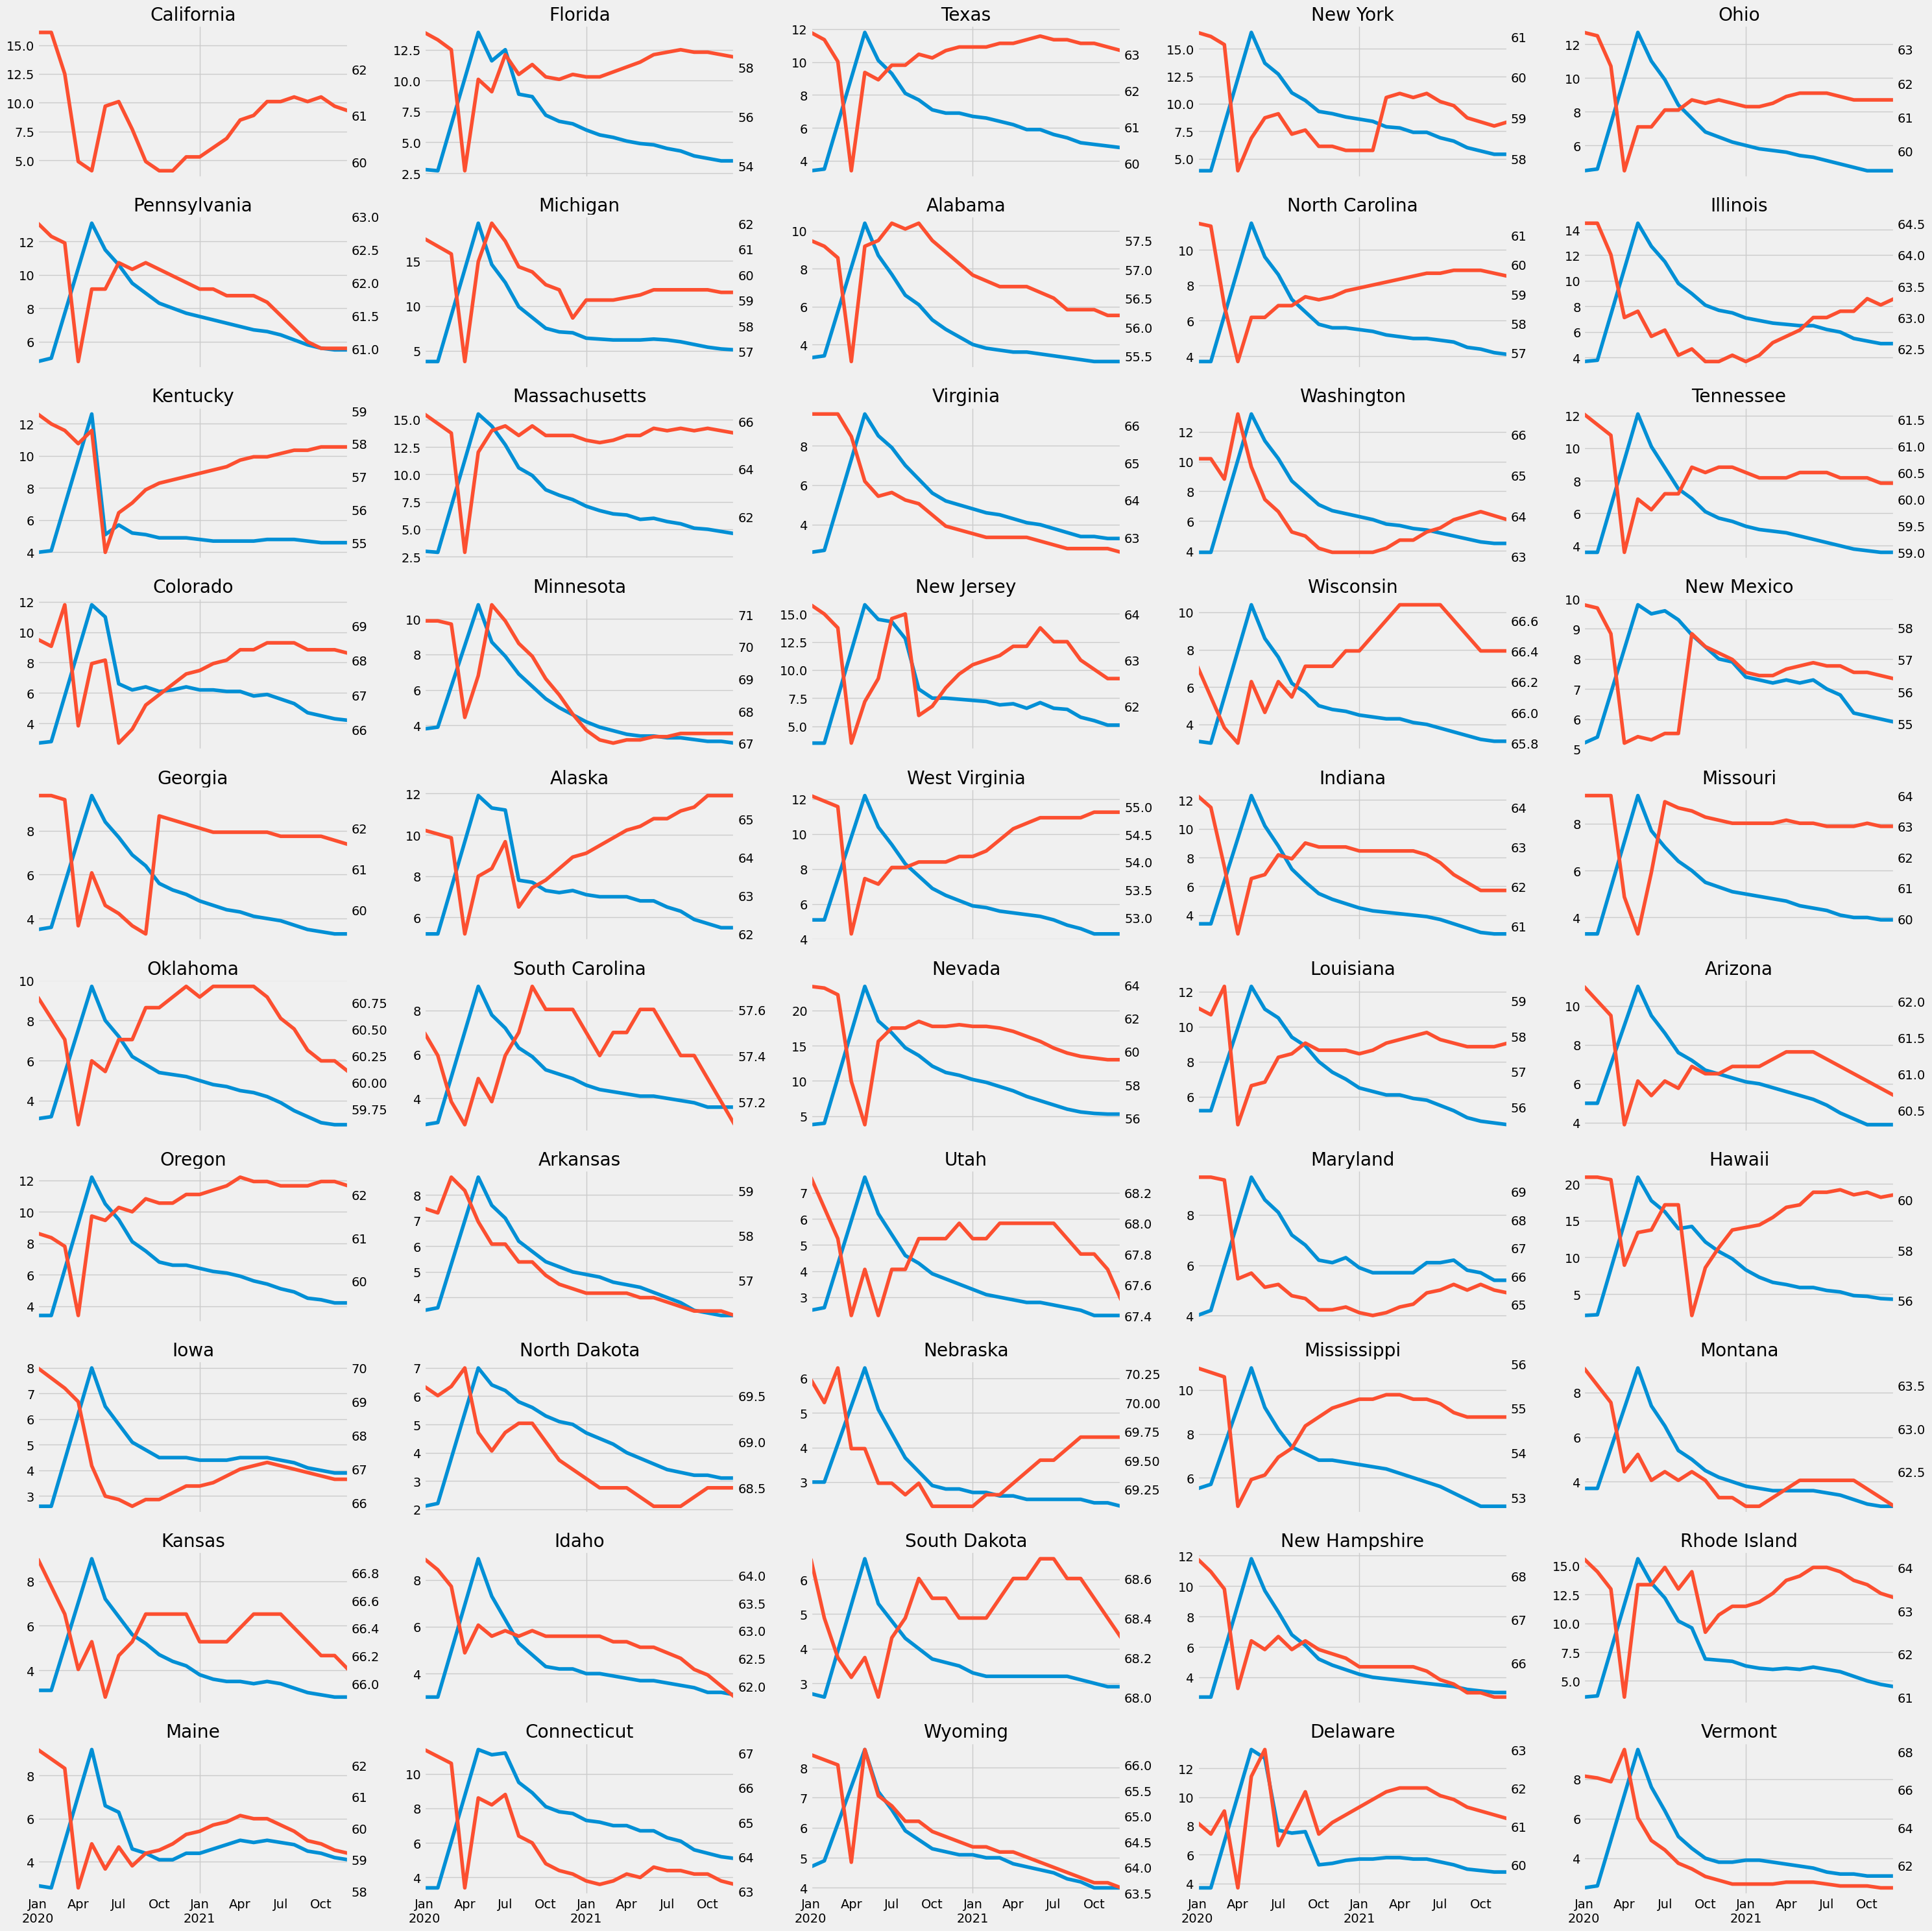

In [22]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

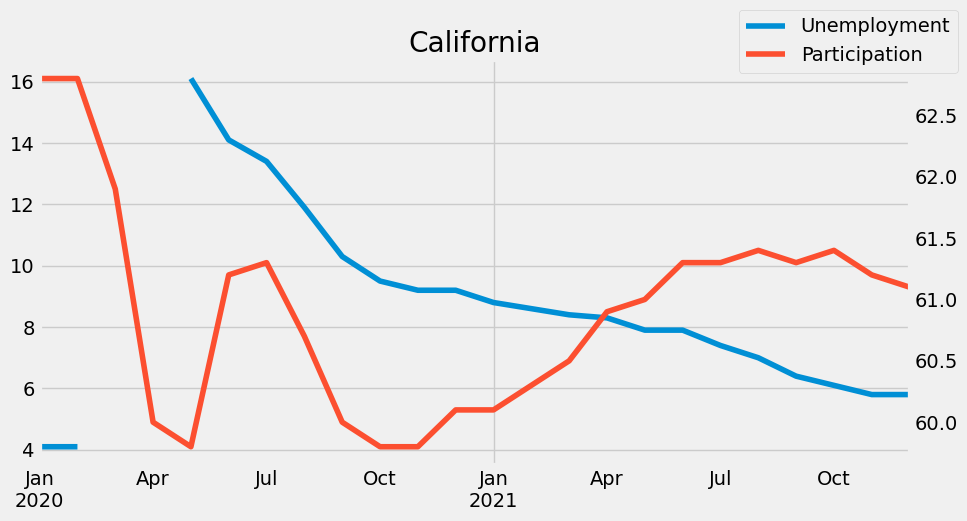

In [23]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_states2 = unemp_states.asfreq('MS')
l1 = unemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()